<a href="https://colab.research.google.com/github/chathasphere/chathasphere.github.io/blob/main/teaching/306_materials/003_lab2_solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 2: ggplot and dplyr

### January 18th, 2022

# 1. Logistics

- Please join Slack and the Lab 3 lab channel in particular if you haven't already
- This week, I will be moving my Tuesday office hour to Wednesday 4:30-6pm
- Starting next week, I will split my OH into 3 chunks to increase coverage
- The purpose of labs...
- We are probably meeting in-person next week

In [1]:
library(tidyverse) # automatically imports ggplot and dplyr

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



# 2. Back to ggplot

Often, we're only interested in a subset of data points. Can help with plotting or running expensive analysis.

## 2.1 Pipe Syntax (Functional Programming)

In [2]:
# randomly sampling a subset from dataset
# setting a random seed ensures replicability
set.seed(108)
# this is "piping" notation 
dm <- diamonds %>% sample_n(1000)
names(dm)
summary(dm)
dim(dm)

[1] "carat"   "cut"     "color"   "clarity" "depth"   "table"   "price"  
 [8] "x"       "y"       "z"

     carat               cut      color      clarity        depth      
 Min.   :0.2300   Fair     : 29   D:109   VS2    :252   Min.   :56.30  
 1st Qu.:0.4000   Good     : 96   E:189   SI1    :250   1st Qu.:61.00  
 Median :0.7000   Very Good:213   F:171   SI2    :153   Median :61.80  
 Mean   :0.7968   Premium  :256   G:216   VS1    :146   Mean   :61.73  
 3rd Qu.:1.0400   Ideal    :406   H:143   VVS2   : 98   3rd Qu.:62.50  
 Max.   :3.2200                   I:116   VVS1   : 60   Max.   :67.30  
                                  J: 56   (Other): 41                  
     table           price               x               y       
 Min.   :44.00   Min.   :  334.0   Min.   :3.850   Min.   :3.91  
 1st Qu.:56.00   1st Qu.:  971.8   1st Qu.:4.728   1st Qu.:4.72  
 Median :57.00   Median : 2398.5   Median :5.715   Median :5.72  
 Mean   :57.44   Mean   : 3941.8   Mean   :5.729   Mean   :5.73  
 3rd Qu.:59.00   3rd Qu.: 5493.0   3rd Qu.:6.522   3rd Qu.:6.51  
 Max.   :67.00   Max.   :187

[1] 1000   10

In [3]:
# optional, look at the documentation
# ?sample_n
# standard syntax
dm <- sample_n(diamonds, 1000)
# functional programming syntax (w/ pipe)
dm <- diamonds %>% sample_n(1000)
# typically, we will use pipes to apply a function to a tibble
# does this work?
dm %>% summary()

     carat               cut      color      clarity        depth      
 Min.   :0.2300   Fair     : 34   D:129   SI1    :260   Min.   :52.70  
 1st Qu.:0.4000   Good     : 90   E:197   VS2    :236   1st Qu.:61.00  
 Median :0.7000   Very Good:204   F:172   SI2    :162   Median :61.90  
 Mean   :0.8017   Premium  :261   G:189   VS1    :141   Mean   :61.74  
 3rd Qu.:1.0300   Ideal    :411   H:162   VVS2   : 87   3rd Qu.:62.50  
 Max.   :3.5000                   I: 96   VVS1   : 54   Max.   :69.80  
                                  J: 55   (Other): 60                  
     table           price               x               y        
 Min.   :52.00   Min.   :  404.0   Min.   :3.920   Min.   :3.920  
 1st Qu.:56.00   1st Qu.:  964.8   1st Qu.:4.700   1st Qu.:4.718  
 Median :57.00   Median : 2586.0   Median :5.715   Median :5.740  
 Mean   :57.54   Mean   : 3893.4   Mean   :5.741   Mean   :5.742  
 3rd Qu.:59.00   3rd Qu.: 5425.5   3rd Qu.:6.510   3rd Qu.:6.510  
 Max.   :70.00   Max. 

## 2.2 Review of ggplot

Every ggplot2 plot has three key components:

- data,

- A set of aesthetic mappings between variables in the data and visual properties, and

- At least one layer which describes how to render each observation. Layers are usually created with a geom function.

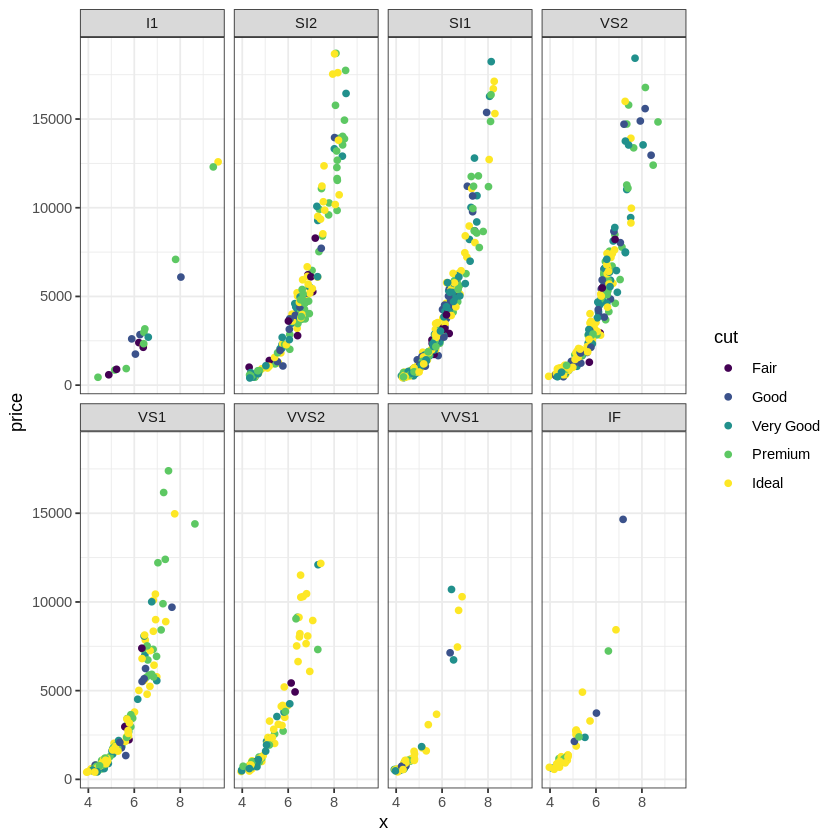

In [4]:
p1 = ggplot(dm) +
    geom_point(aes(x, price, color = cut)) + 
    facet_wrap(vars(clarity), ncol=4) + 
    theme_bw() # optional: add a theme layer
print(p1)

# some available themes: theme_bw, theme_classic, theme_void...
# feel free to explore!

## this code does the same thing!
# p1 = ggplot(dm, aes(x, price, color = cut)) +
#     geom_point() +
#     facet_wrap(vars(clarity), ncol=4) 
# print(p1)

## 2.3 Layering Geometric Objects
Suppose we are interested in identifying trends in our data. We can plot a smooth line of best fit as follows:

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



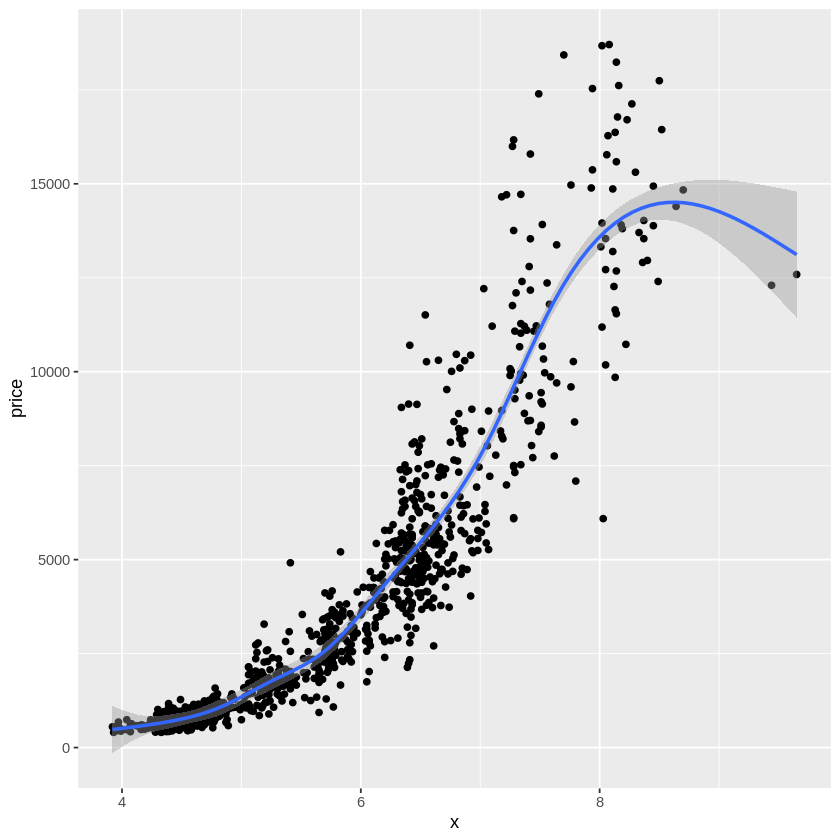

In [5]:
p2 = ggplot(dm) +
    geom_point(aes(x, price)) + # we can specify the aes. mapping
    geom_smooth(aes(x, price))  # for EACH geom layer
print(p2)

### Exercise 1
In the above fit, use locally weighted scatterplot smoother instead general additive model (loess).

How do you go about checking the documentation?

`geom_smooth()` using formula 'y ~ x'



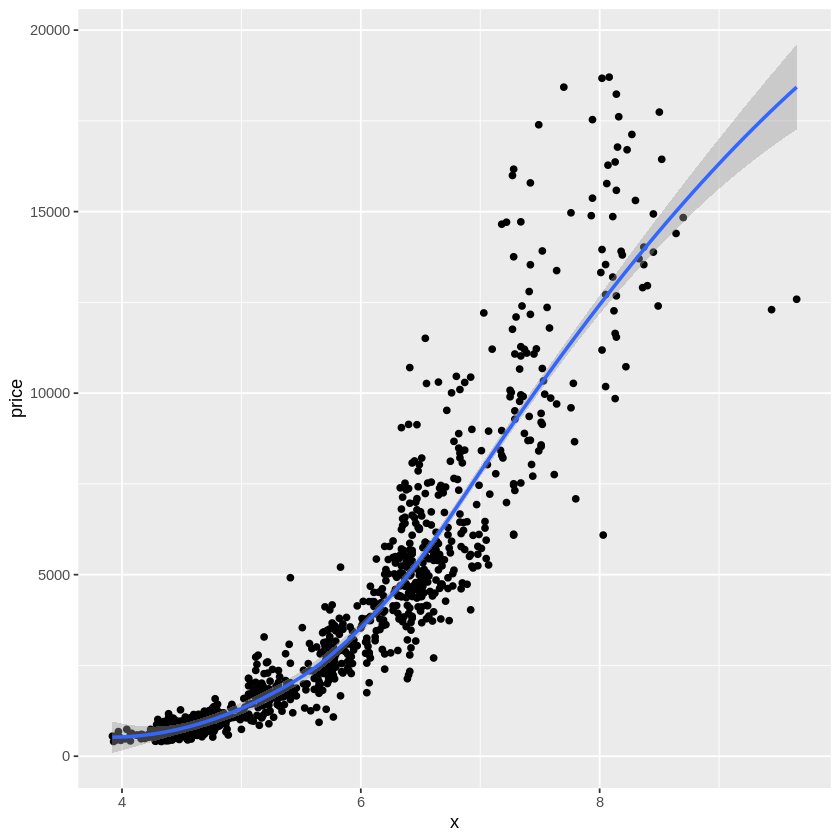

In [7]:
p3 = ggplot(dm) +
    geom_point(aes(x, price)) + # we can specify the aes. mapping
    geom_smooth(aes(x, price), method="loess")  # for EACH geom layer
print(p3)

### Exercise 2.1 
Same as before, but try fitting a linear best fit.

`geom_smooth()` using formula 'y ~ x'



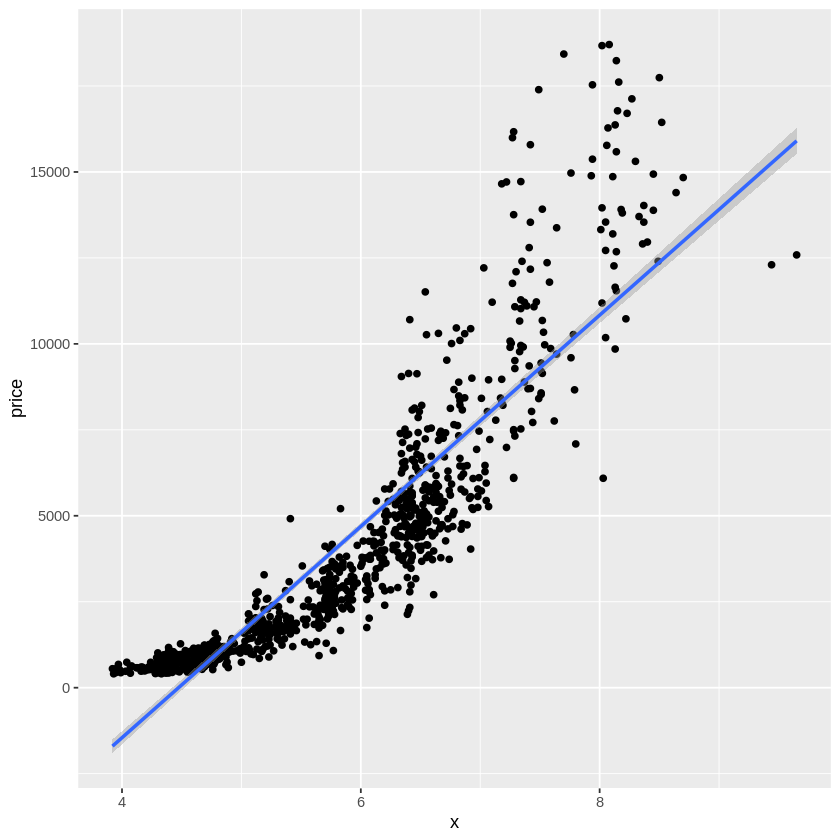

In [8]:
p4 = ggplot(dm) +
    geom_point(aes(x, price)) + # we can specify the aes. mapping
    geom_smooth(aes(x, price), method="lm")  # for EACH geom layer
print(p4)

### Exercise 2.2

Fit a linear line but with both variables log-scaled.

(You do not need to do anything if your previous code is correct)

`geom_smooth()` using formula 'y ~ x'



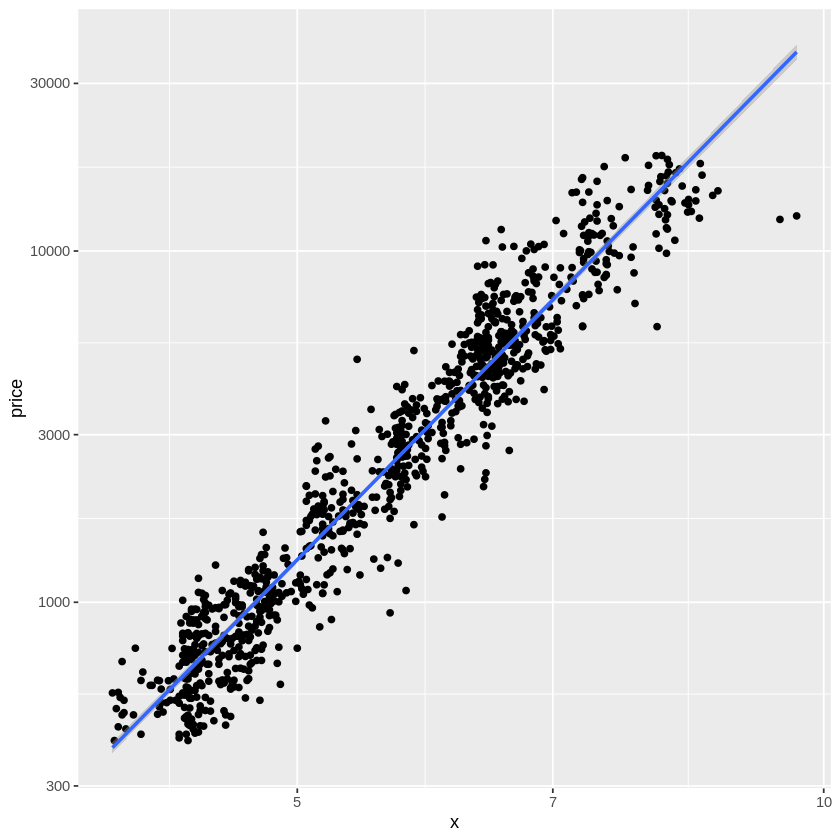

In [9]:
p4 + scale_x_continuous(trans='log10') + 
     scale_y_continuous(trans='log10')

### Why would log-log plot make sense?

A log-log plot describes the relationship $Price = c \cdot Carat^k$ for some constant $c, k > 0$.

* Going from 0.1 carats to 0.2 carats may not be worth much, but increasing from 1.9 carats to 2.0 carats would result in a significant increase in price.
* Let's look at the following relationship
$$ Price = c \cdot Carat^k \Rightarrow \log Price = \log c + k \log x$$
* You can see that once we transform both variables with log, we have a linear relationship between $\log Price$ and $\log Carat$.

### Exercise 2.3
Make separate linear lines for each category of the clarity variable. *Hint: give each line a different color based on clarity.*

`geom_smooth()` using formula 'y ~ x'



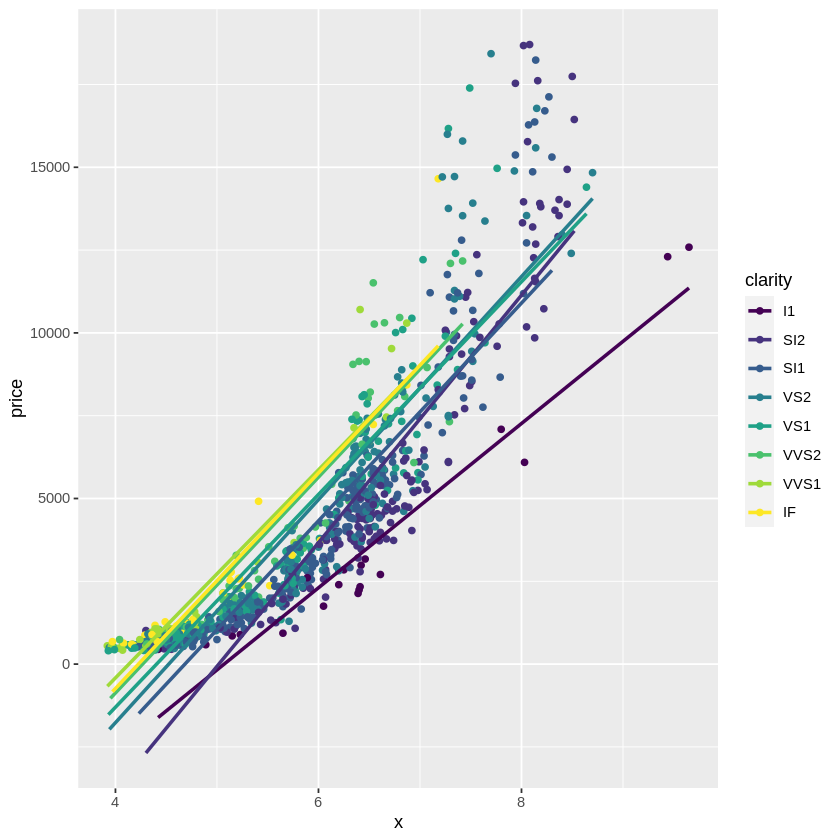

In [12]:
# optional: think about how we could disable the confidence interval
# our code here
p4 = ggplot(dm) +
    geom_point(aes(x, price, color=clarity)) + # we can specify the aes. mapping
    geom_smooth(aes(x, price, color=clarity), method="lm", se=F)  # for EACH geom layer
print(p4)

### Exercise 3
Can we rewrite the above to reduce the code duplication above? (Both geom objects have the same aesthetic mapping...)

`geom_smooth()` using formula 'y ~ x'



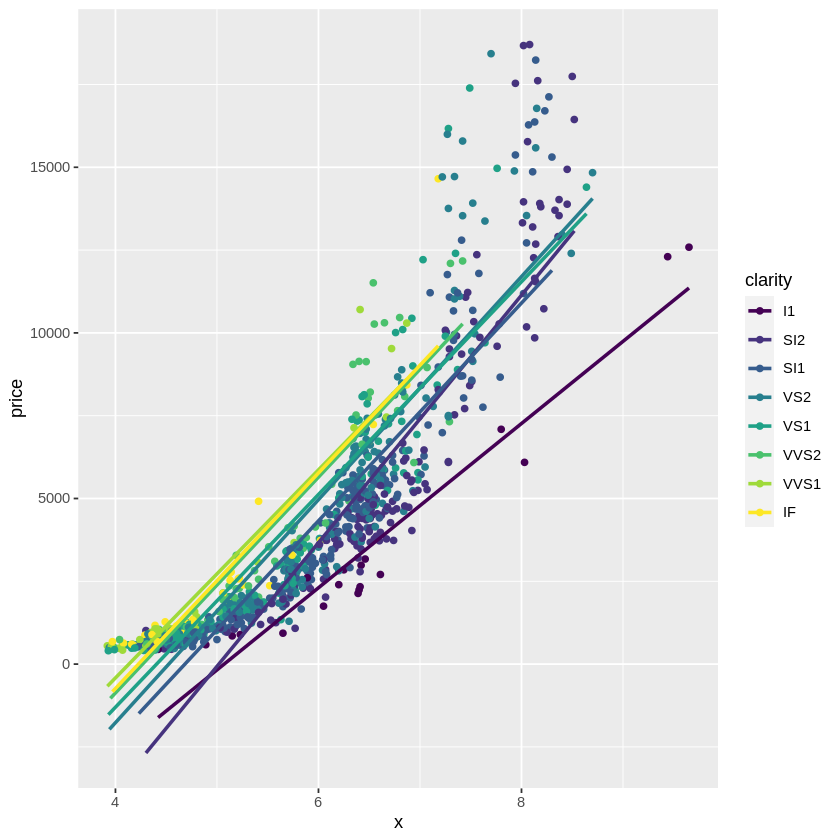

In [14]:
p4 = ggplot(dm, aes(x, price, color=clarity)) +
    geom_point() + # we can specify the aes. mapping
    geom_smooth( method="lm", se=F)  # for EACH geom layer
print(p4)

### Self-Study
What geom would you use to draw a line chart? A boxplot? A histogram? An area chart?


In [ ]:
# Boxplot

# Histogram

# Area Chart

# 3. Customizing ggplot

## 3.1 Statistical Transformations
Many graphs, like scatterplots, plot the raw values of your dataset. Other graphs, like bar charts, calculate new values to plot.

You can learn which stat a geom uses by inspecting the default value for the 'stat' argument. For example, `?geom_bar` shows that the default value for stat is 'count', which means that `geom_bar()` uses `stat_count()`.

`stat_count()` is documented on the same page as geom_bar(), and if you scroll down you can find a section called "computed variables." That describes how it computes two new variables: count and prop.


In [ ]:
?geom_bar

In [15]:
popn <- tribble(
~city, ~population,
"Istanbul", 15029231,
"Moscow", 12615279,
"Saint Petersburg", 9126366,
"Berlin", 5383890,
"Madrid", 3748148
)

![We want a plot that looks like this.](https://raw.githubusercontent.com/enesdilber/stats306_labs/master/lab2/graph5.png)

### Bar Plots in ggplot

How do we reproduce the above plot?

In [ ]:
# this doesn't look right
ggplot(data = popn, aes(city)) + 
  geom_bar()

In [ ]:
# this will raise an error
ggplot(data = popn, aes(city, population)) + 
  geom_bar()

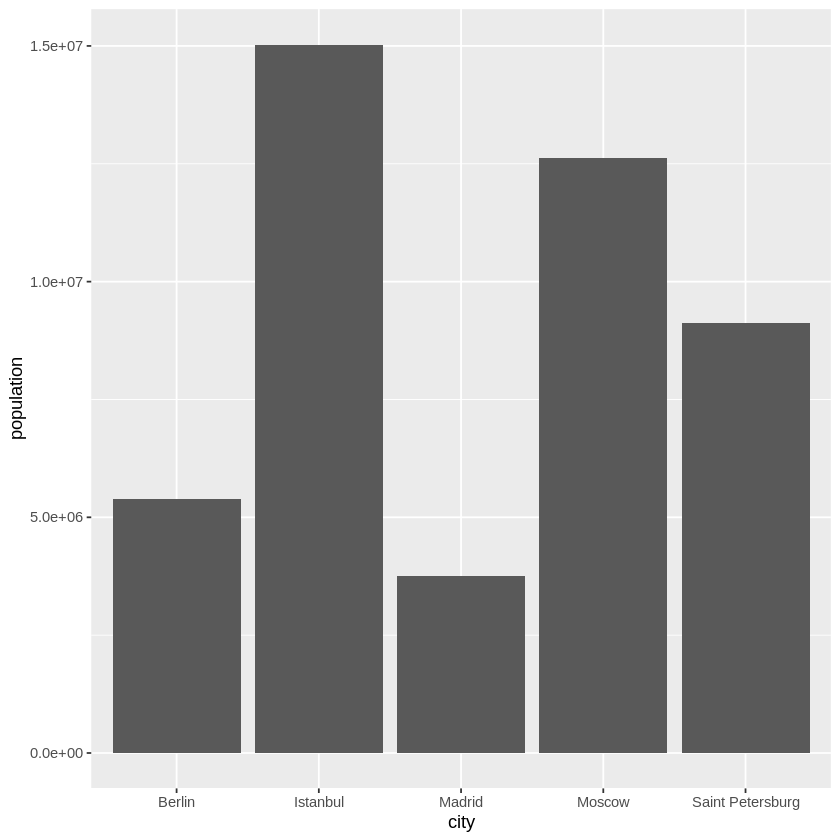

In [19]:
# we can override the default stat
# and supply a variable mapped to the y-axis!
ggplot(data = popn, aes(city, population)) + 
  geom_bar(stat="identity")

### Exercise 4
Use `geom_col` to reproduce a bar plot of cities by population. (No need to override the default `stat`). Remember to supply a title!

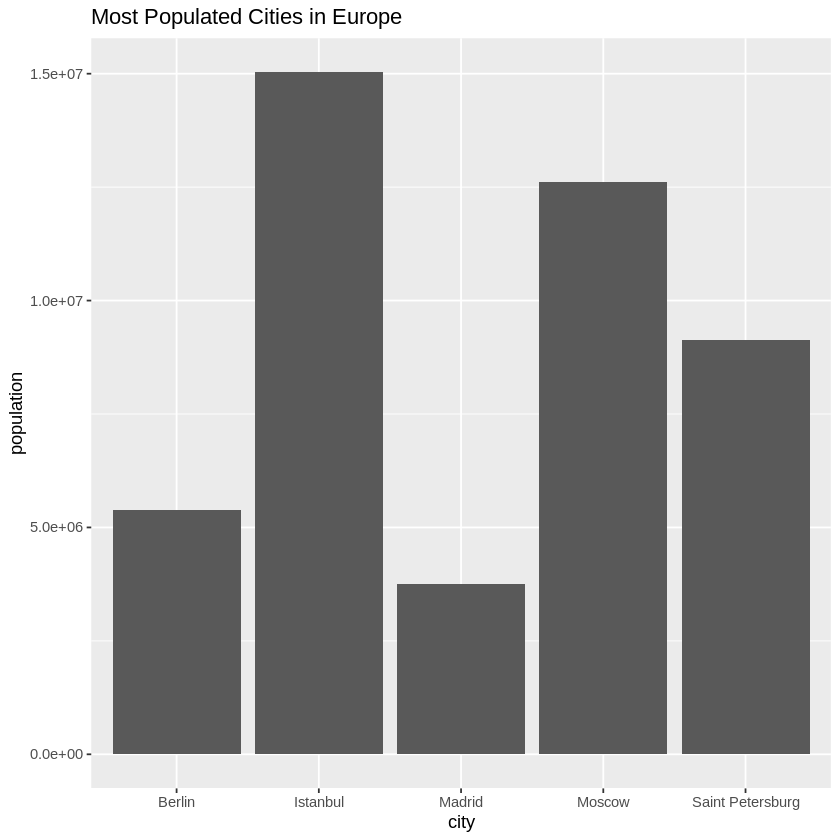

In [16]:
# your code here
ggplot(data = popn, aes(city, population)) + 
    geom_col() + ggtitle("Most Populated Cities in Europe")

### Proportion Bar Plot

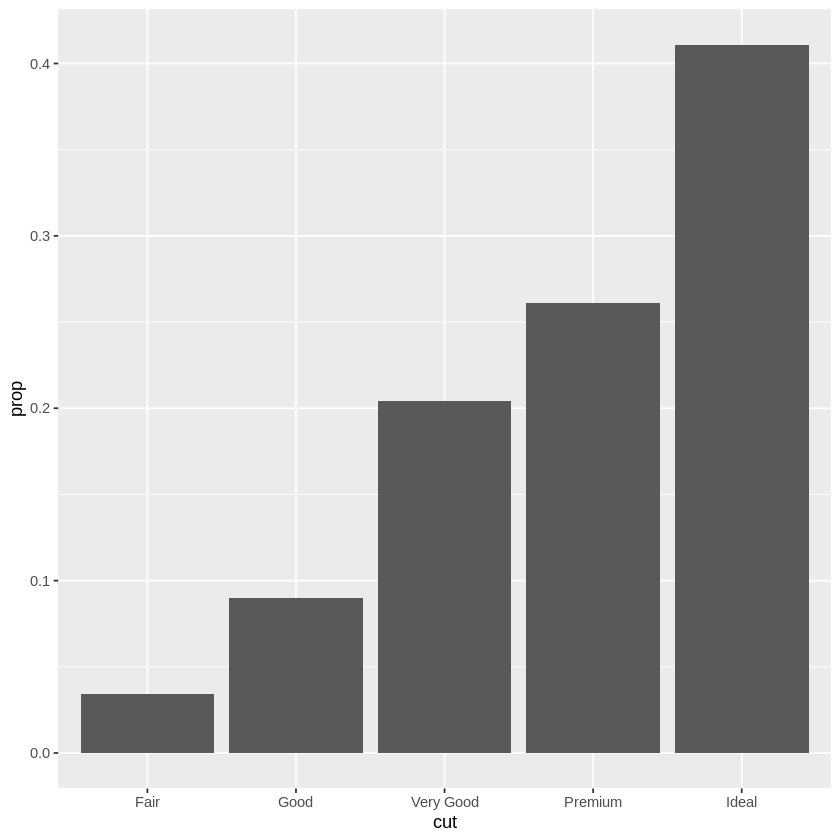

In [17]:
ggplot(data = dm) + 
    geom_bar(mapping = aes(x=cut, y=..prop.., group=1))

### Summary Plots

Other times, you want to draw greater attention to the statistical transformation in your code. For example, you might use stat_summary() which summarises the y values for each unique x value, to draw attention to the summary that you're computing:

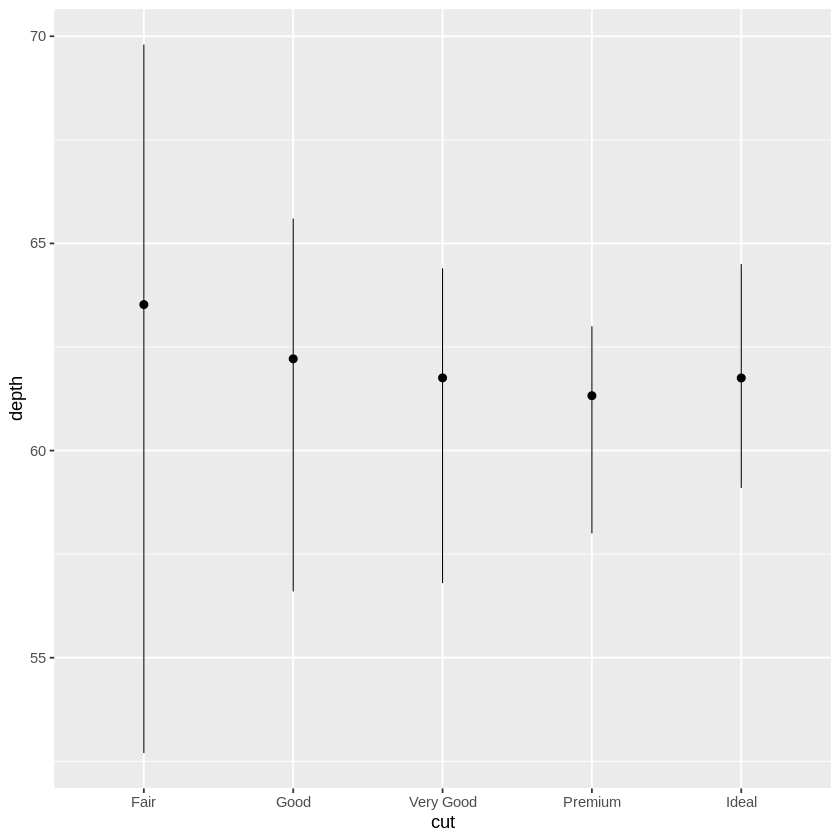

In [18]:
ggplot(data = dm, aes(cut, depth)) + 
    stat_summary(fun = mean, fun.min = min, fun.max = max, size=0.3)

  # try playing around with different options for "fun"

### Self-Study
1. What is the default geom associated with stat_summary()? How could you rewrite the previous plot to use that geom function instead of the stat function?
2. What does geom_col() do? How is it different to geom_bar()?
3. Most geoms and stats come in pairs that are almost always used in concert. Read through the documentation and make a list of all the pairs. What do they have in common?
4. What variables does stat_smooth() compute? What parameters control its behaviour?
5. In our proportion bar chart, we need to set group = 1. Why?

*Remark: for question 5, setting `group` equal to 1 ensures that every observation belongs to the same group. We could have set group to any constant. Then the proportion is calculated out of the total size of the data set.*

## 3.2 Position adjustments

### geom_bar

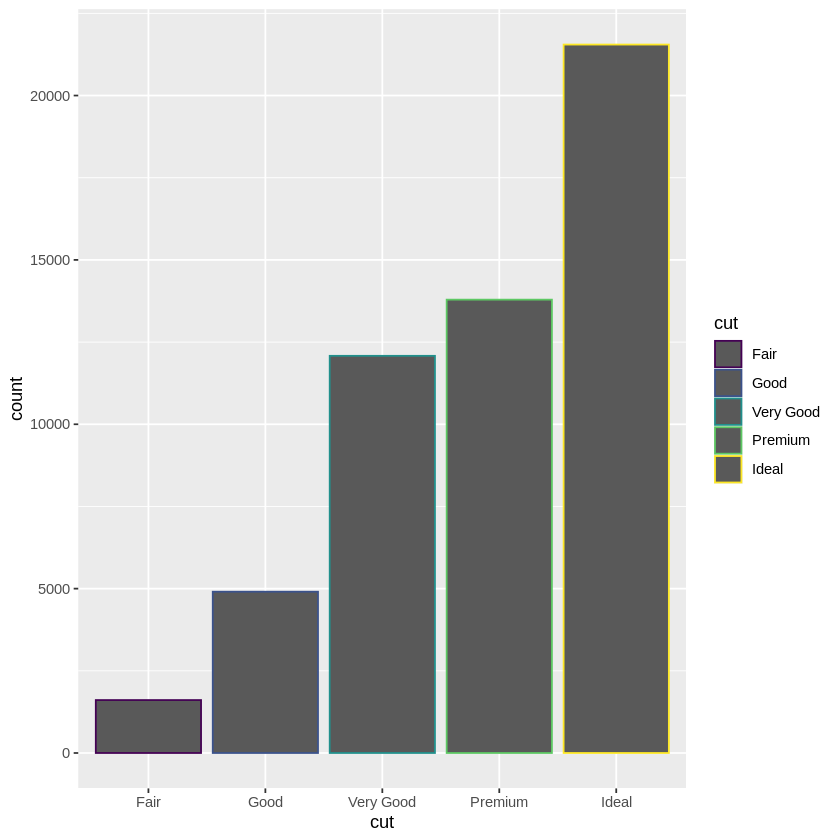

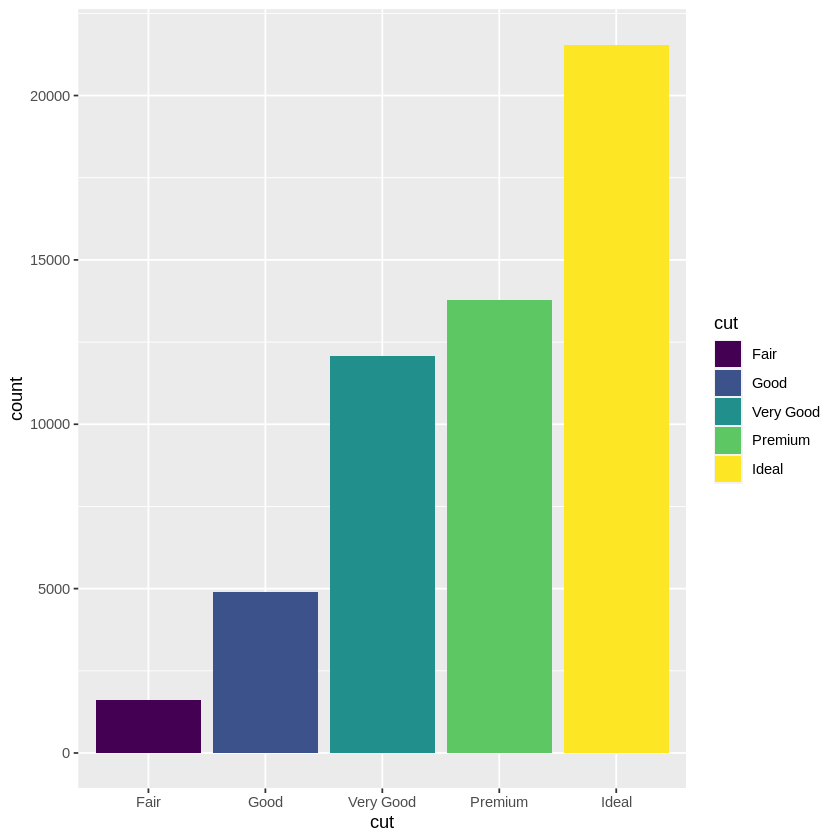

In [20]:
# Difference between color and fill
ggplot(data = diamonds) + 
  geom_bar(mapping = aes(x = cut, colour = cut))
ggplot(data = diamonds) + 
  geom_bar(mapping = aes(x = cut, fill = cut))

Remember that we can "color by" a different variable - in this case, clarity. By default, it stacks the bars for each clarity level. This is done using the positional adjustment specified by the position argument of geom_bar. If you don't want a stacked bar chart, you can use one of three other options: "identity", "dodge", or "fill".

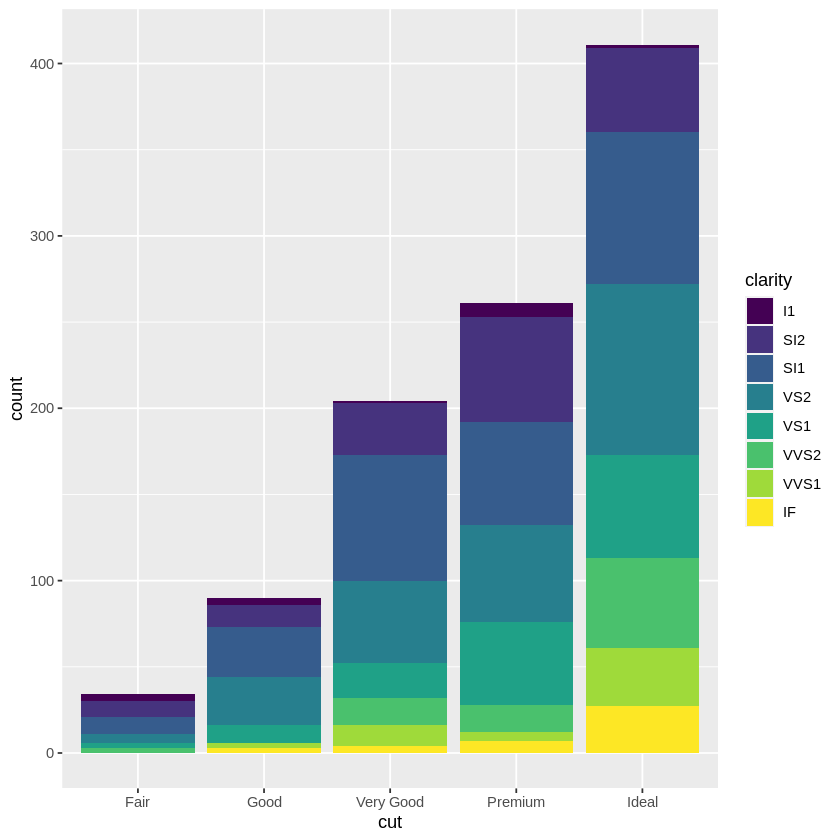

In [21]:
ggplot(data = dm, aes(x = cut)) + 
  geom_bar(aes(fill = clarity))

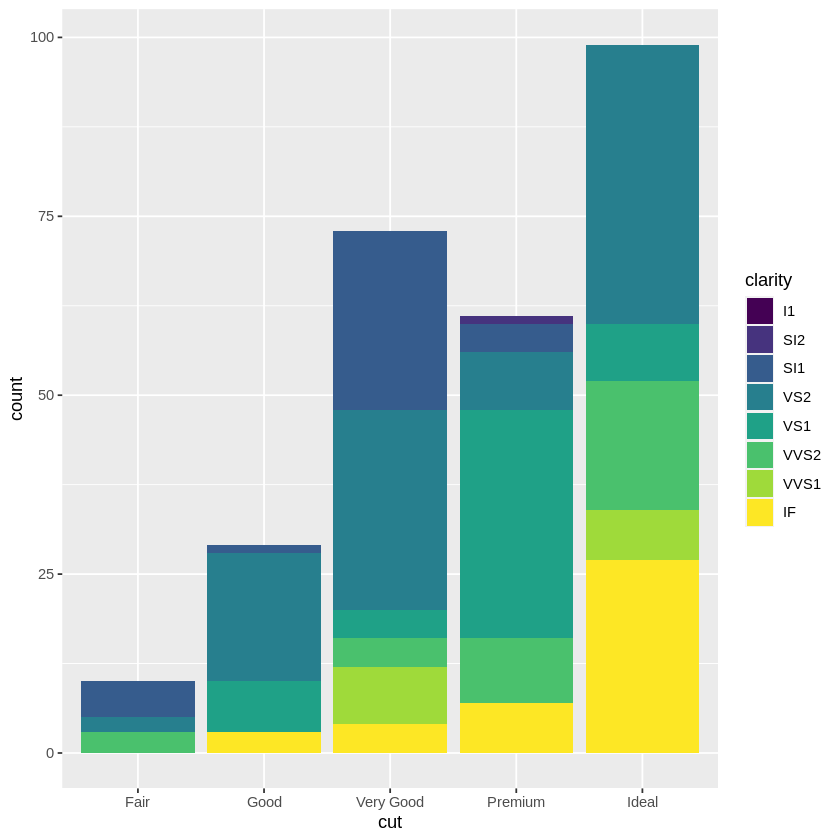

In [22]:
# position "identity"
# overlaps bars
# not particularly useful, imo
ggplot(data = dm) + 
  geom_bar(mapping = aes(x = cut, fill = clarity), position = "identity")

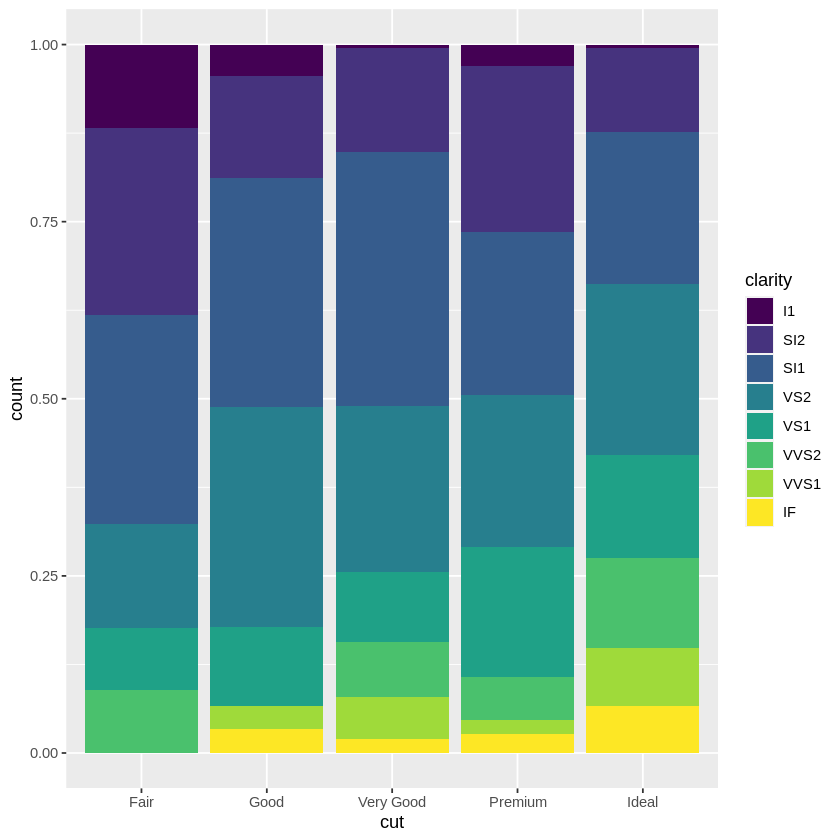

In [23]:
# position "fill"
# each stacked bar is same height
# useful for comparing proportions
ggplot(data = dm) + 
  geom_bar(mapping = aes(x = cut, fill = clarity), position = "fill")

### Exercise 5
Implement a bar plot with `position = 'dodge'`.

This places overlapping objects directly beside one another, which makes it easier to compare individual values.

![Caption for the picture.](https://raw.githubusercontent.com/enesdilber/stats306_labs/master/lab2/graph10.png)

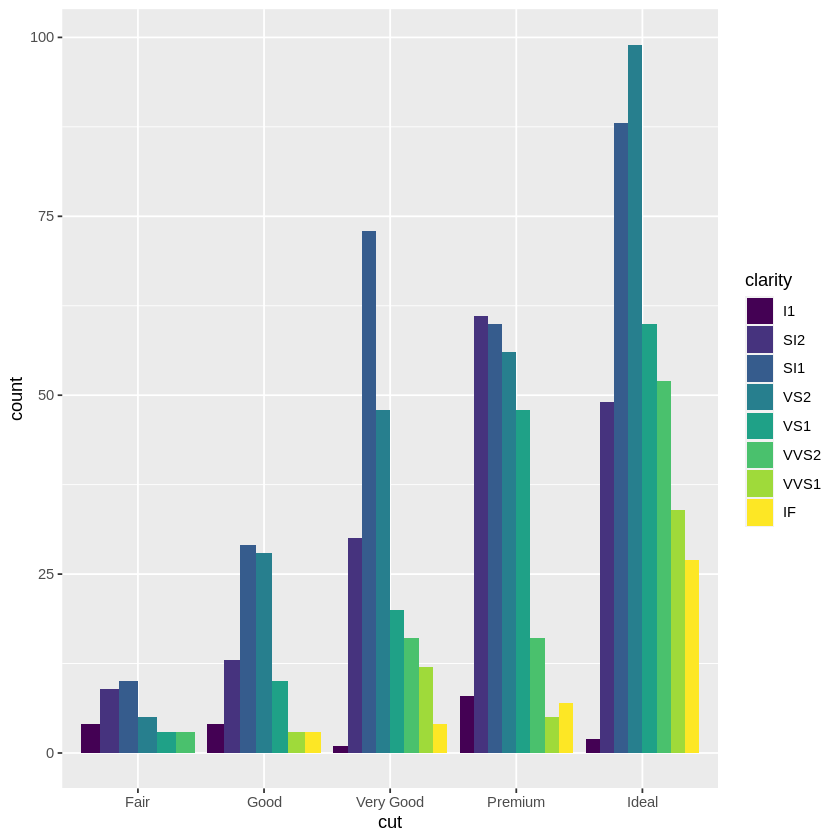

In [24]:
ggplot(data = dm) + 
  geom_bar(mapping = aes(x = cut, fill = clarity), position = "dodge")

### Jitter
A positional adjustment that is very useful for scatterplots with overlaps is the 'jitter' argument. *However, you have to be careful not to interpret the random positioning of points on the x-axis as meaningful.*

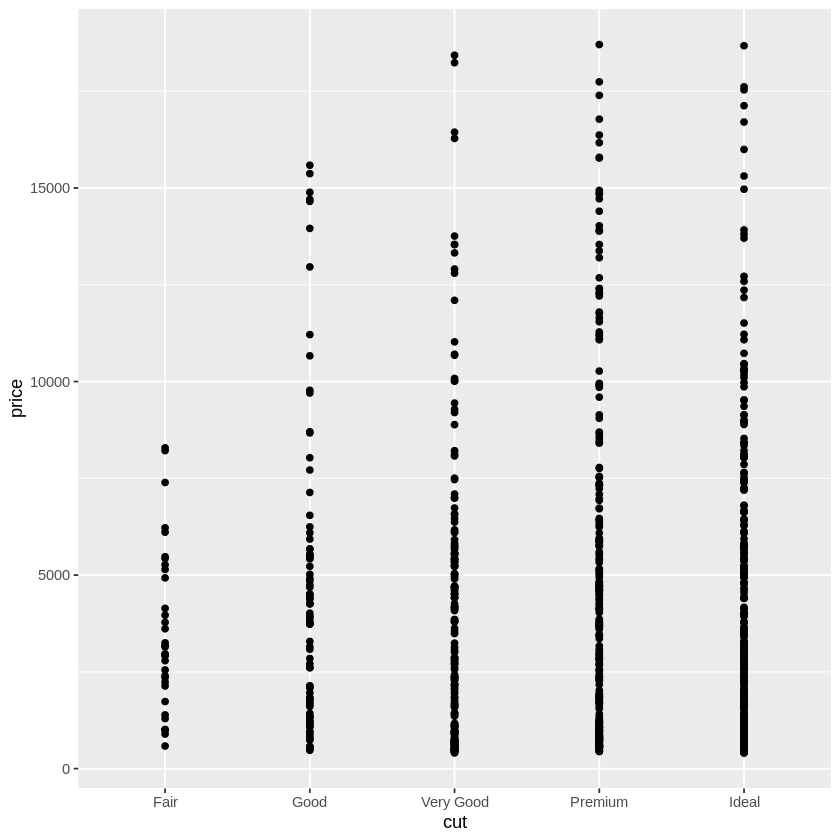

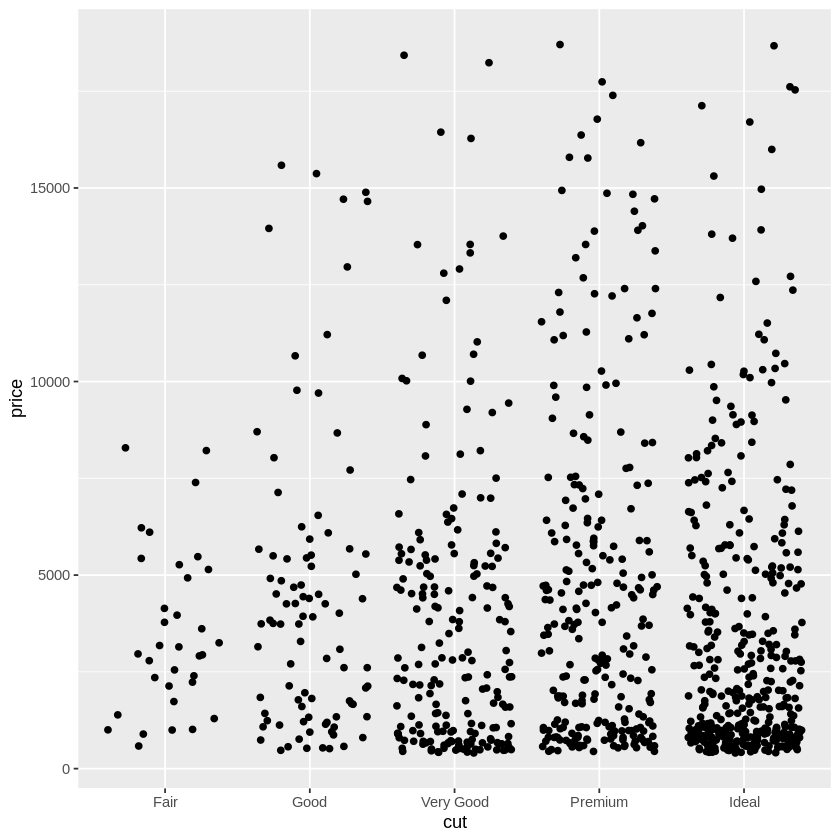

In [25]:
ggplot(data = dm) + 
  geom_point(mapping = aes(x = cut, y = price))

ggplot(data = dm) + 
  geom_point(mapping = aes(x = cut, y = price), position = "jitter")

### Self Study
1. What parameters to geom_jitter() control the amount of jittering?
2. Compare and contrast geom_jitter() with geom_count().
3. What's the default position adjustment from geom_boxplot()? Create a visualization of the mpg dataset and demostrate it. 
Make sure you go through coordinate systems.



# 4. dplyr for Data Manipulation

In [27]:
dim(dm)
head(dm)

[1] 1000   10

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.71,Premium,G,VS1,60.8,59,2686,5.76,5.72,3.49
0.50,Premium,E,SI1,59.9,58,1593,5.18,5.17,3.10
0.90,Very Good,G,SI2,61.4,58,3489,6.16,6.21,3.80
0.71,Premium,E,SI1,60.3,60,2674,5.77,5.74,3.47
0.30,Ideal,E,VVS2,61.5,55,731,4.33,4.35,2.67
1.56,Premium,E,SI2,62.4,60,9909,7.36,7.41,4.61


Simply run 'dm' after declaring the dm variable above. can you guess what 'dbl', 'ord', and 'int' are?

Notice how the levels below follow an order. Indeed, we expect Fair < Good < Very Good < Premium < Ideal

In [28]:
print(levels(dm$cut))
print(levels(dm$color))
print(levels(dm$clarity))

[1] "Fair"      "Good"      "Very Good" "Premium"   "Ideal"    
[1] "D" "E" "F" "G" "H" "I" "J"
[1] "I1"   "SI2"  "SI1"  "VS2"  "VS1"  "VVS2" "VVS1" "IF"  


In [29]:
sizes = c("M", "S", "S", "M", "XL", "XXL", "XL", "S", "M", "L")
levels(as.factor(sizes)) # factors are just categorical variables in R

[1] "L"   "M"   "S"   "XL"  "XXL"

In [30]:
sizes = ordered(sizes, levels = c("S", "M", "L", "XL", "XXL"))
levels(sizes)

[1] "S"   "M"   "L"   "XL"  "XXL"

There are five fundamental functions in dplyr: `filter`, `arrange`, `select`, `mutate` and `summarise`. All of them have the following properties:
1. The first argument is a data frame.
2. The subsequent arguments indicate what to do with the data frame, using the variable names (without quotes).
3. The result is a new data frame.

## 4.1 Filter
Used if you want to view or store a new dataset containing a subset of the full dataset.

In [31]:
filter(dm, cut == 'Fair', color == 'J')

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1.50,Fair,J,SI2,65.5,60,5268,7.07,7.03,4.62
1.05,Fair,J,SI2,65.8,59,2789,6.41,6.27,4.18


Usually you want to store the newly subsetted data in memory. 

In [32]:
worst_diamonds = filter(dm, cut == 'Fair', color == 'J')

Make sure to use '==' instead of '='. The former is to test equality while the latter is for assignments. 

###  Exercise 6

Practice filtering on multiple conditions.

In [33]:
# filter for rows that have color J or a fair cut
a = filter(dm, cut == "Fair" | color == "J") 

# # filter for rows that have color J and a fair cut
b = filter(dm, cut == "Fair" & color == "J") 

# filter for rows that don't have a fair cut
c = filter(dm, cut != "Fair")

# filter for rows that have either color J or a fair cut (and not both!)
d = filter(dm, xor(cut == "Fair", color == "J"))  # look for XOR gate

# filter for rows that have a carat less than 1.0
e = filter(dm, carat < 1.0)

In R, if you want to find if a variable's value is missing, use the is.na() function. In particular, do not check for equality with NA:

In [34]:
x = 4
x == NA
is.na(x)

[1] NA

[1] FALSE

Similarly, never put an equality condition with NA in your dplyr filter() statements

In [35]:
# create a dataframe
df = tibble(x = c(1, NA, 3))
print(df)

# A tibble: 3 × 1
      x
  <dbl>
1     1
2    NA
3     3


In [36]:
filter(df, x>1)

x
<dbl>
3


In [37]:
filter(df, is.na(x) | x > 1)

x
<dbl>
NA
3


### Self Study
1. Write code using filter that will allow you to output diamonds with colors D or E and cuts Good or Very Good
2. Write code using filter that wil allow you to output diamonds with even-numbered prices

## 4.2 Arrange
Useful for ordering rows!

In [38]:
arrange(dm, clarity, color)[1:20,] 
# this sorts first by clarity, and then by color

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.81,Good,E,I1,64.1,59,2608,5.89,5.85,3.76
0.32,Premium,E,I1,60.9,58,444,4.42,4.38,2.68
0.84,Good,F,I1,60.8,64,1749,6.05,6.03,3.67
0.50,Premium,F,I1,61.9,58,851,5.15,5.05,3.15
1.72,Premium,F,I1,60.5,59,7089,7.80,7.71,4.69
0.58,Fair,F,I1,65.8,56,893,5.23,5.12,3.41
1.04,Fair,F,I1,65.4,60,2134,6.39,6.30,4.15
0.50,Fair,F,I1,69.8,55,584,4.89,4.80,3.38
1.00,Premium,G,I1,62.5,62,2984,6.42,6.35,3.99


Missing values are always sorted at the end:

In [39]:
df = tibble(x = c(5, NA, 2))
arrange(df, x)

x
<dbl>
2
5
NA


In [40]:
arrange(df, desc(x))

x
<dbl>
5
2
NA


### Exercise 7
Use arrange to sort the dm dataset by describing order of the product of the x, y, and z variables. Output the first 20 rows of the new dataset.

Next week, we'll look at `select`, `mutate`, and `summarise`!

In [42]:
dm %>% arrange(desc(x*y*z)) %>% head(20)

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
3.50,Ideal,H,I1,62.8,57,12587,9.65,9.59,6.03
3.24,Premium,H,I1,62.1,58,12300,9.44,9.40,5.85
2.37,Premium,I,VS2,61.6,56,14837,8.70,8.60,5.33
2.35,Premium,J,VS1,60.7,60,14399,8.64,8.60,5.23
2.34,Good,J,VS2,63.9,62,12961,8.40,8.34,5.35
2.27,Premium,I,SI2,62.5,59,14937,8.45,8.39,5.26
2.26,Premium,H,SI2,61.1,57,13885,8.45,8.40,5.15
2.28,Very Good,H,SI2,63.3,54,12907,8.36,8.29,5.27
2.22,Ideal,J,SI2,62.8,57,13703,8.33,8.29,5.22
